In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None) # 设置显示最大列数
pd.set_option('display.max_rows', 150) # 设置显示最大行数
pd.set_option('display.max_seq_items', None) # 结果全部返回
 
# %config InlineBackend.figure_formats = {'pdf',}

%matplotlib inline 
# 直接生成图像

import seaborn as sns
sns.set_context('notebook') # 四种预设，按相对尺寸的顺序(线条越来越粗)，分别是paper，notebook, talk, and poster。
sns.set_style('white') # 底色

In [2]:
def warmUpExercise():
    return(np.identity(5))

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
print(os.getcwd())

/Users/Raymond/Desktop/杨添凯_1712950_第1次作业


In [5]:
data = np.loadtxt(os.getcwd()+'/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]] # 包含x数组的矩阵，每行[1, x]. 
y = np.c_[data[:,1]]
theta = np.zeros((2,1))

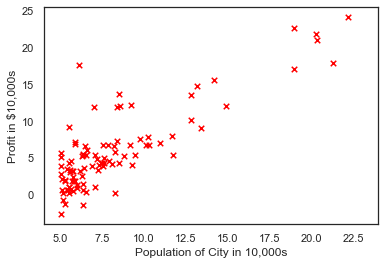

In [6]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1) # 取X的第二列作为x
plt.xlim(4,24) # 设置x的范围是4-24
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [7]:
def computeCost(X, y, theta):
    m = y.size
    J = 0
    h = X.dot(theta)   
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

In [8]:
computeCost(X, y, theta)

32.072733877455676

In [9]:
def gradientDescent(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

h(x) =-3.63 + 1.17·x1


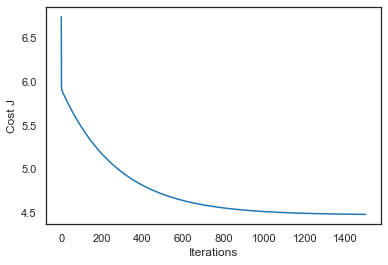

In [10]:
# 最小cost J的theta
theta , Cost_J = gradientDescent(X, y, [[0],[0]])
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"·x1")

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

Text(0, 0.5, 'Profit in $10,000s')

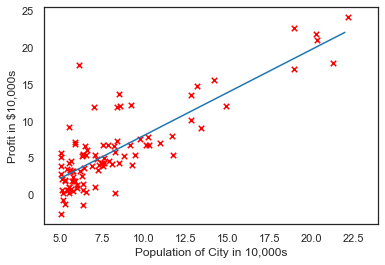

In [11]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# 画出梯度下降
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy)

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [12]:
# 预测一个有35000-70000人的城市的profit
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


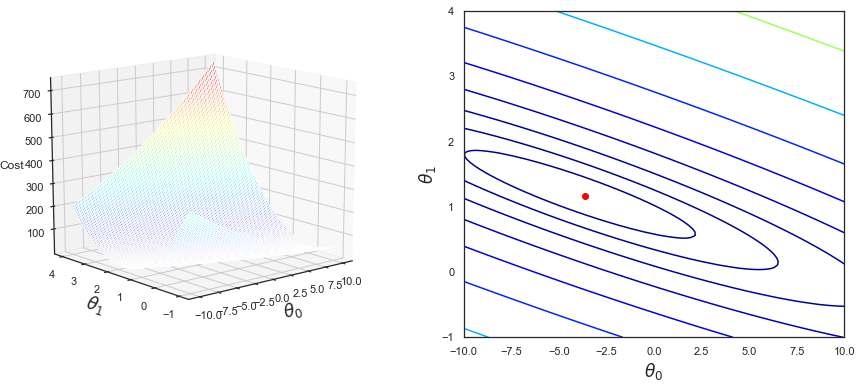

In [13]:
B0 = np.linspace(-10, 10, 100)
B1 = np.linspace(-1, 4, 100)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax1.set_zlabel('Cost')
ax1.set_zlim(Z.min(),Z.max())
ax1.view_init(elev=15, azim=230)

CS = ax2.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax2.scatter(theta[0],theta[1], c='r')

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

In [14]:
data2 = np.loadtxt(os.getcwd()+'/ex1data2.txt', delimiter=',')
X2 = np.c_[data2[:,0], data2[:,1]]
y2 = np.c_[data2[:,2]]

In [15]:
def featureNormalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    
    return X_norm , mean , std

In [16]:
X2, mean_X2, std_X2 = featureNormalization(X2)
m2 = y2.size
X2 = np.append(np.ones((m2,1)), X2, axis=1)
theta2 = np.zeros((3,1))

In [17]:
computeCost(X2, y2, theta2)

65591548106.45744

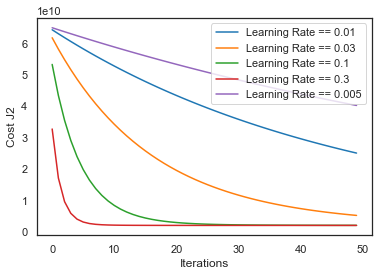

In [18]:
theta2 , Cost_J2 = gradientDescent(X2, y2,[[0],[0],[0]], 0.01, 50)
theta2_1 , Cost_J2_1 = gradientDescent(X2, y2,[[0],[0],[0]], 0.03, 50)
theta2_2 , Cost_J2_2 = gradientDescent(X2, y2,[[0],[0],[0]], 0.1, 50)
theta2_3 , Cost_J2_3 = gradientDescent(X2, y2,[[0],[0],[0]], 0.3, 50)
theta2_3 , Cost_J2_4 = gradientDescent(X2, y2,[[0],[0],[0]], 0.005, 50)

plt.plot(Cost_J2, label='Learning Rate == 0.01')
plt.plot(Cost_J2_1, label='Learning Rate == 0.03')
plt.plot(Cost_J2_2, label='Learning Rate == 0.1')
plt.plot(Cost_J2_3, label='Learning Rate == 0.3')
plt.plot(Cost_J2_4, label='Learning Rate == 0.005')
plt.ylabel('Cost J2')
plt.xlabel('Iterations');
plt.legend(loc=1);

In [19]:
print("选择“0.01”作为Learning Rate")
theta2 , Cost_J2 = gradientDescent(X2, y2,[[0],[0],[0]], 0.01, 400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"·x1 + "+str(round(theta2[2,0],2))+"·x2")
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample = np.append(np.ones(1),x_sample)
print(theta2.T.dot(x_sample))

选择“0.01”作为Learning Rate
h(x) =334302.06 + 99411.45·x1 + 3267.01·x2
[430446.5006128]
